# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

In [1]:
# Read data into a dataframe and call info()
    # Example call:
    # df = pd.DataFrame({"A":[1, 2, 3], "B":[4, 5, 6]})
    # df.info()
import pandas as pd
df = pd.read_csv("Netflix_Movies_and_TV_Shows.csv")
df.head()


,Title,Type,Genre,Release Year,Rating,Duration,Country
0,Title 1,TV Show,Comedy,1955,PG,3 Seasons,Japan
1,Title 2,TV Show,Horror,2020,G,3 Seasons,India
2,Title 3,TV Show,Action,1966,TV-PG,140 min,United States
3,Title 4,Movie,Thriller,2011,PG-13,3 Seasons,Canada
4,Title 5,TV Show,Romance,1959,TV-14,172 min,India


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         3000 non-null   object
 1   Type          3000 non-null   object
 2   Genre         3000 non-null   object
 3   Release Year  3000 non-null   int64 
 4   Rating        3000 non-null   object
 5   Duration      3000 non-null   object
 6   Country       3000 non-null   object
dtypes: int64(1), object(6)
memory usage: 164.2+ KB


# My Question

### What’s the probability of the next Netflix movie or TV show being a Romance, based on the current genre distribution?

# My Analysis

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
genre_counts = df['Genre'].value_counts()

print(genre_counts)

Horror         398
Thriller       398
Drama          378
Romance        376
Comedy         369
Documentary    369
Action         367
Sci-Fi         345
Name: Genre, dtype: int64


In [5]:
frequency_table = pd.DataFrame({
    'Genre': genre_counts.index,
    'Count': genre_counts.values,
    'Percentage': (genre_counts / genre_counts.sum()) * 100
})

print(frequency_table)

                   Genre  Count  Percentage
Horror            Horror    398   13.266667
Thriller        Thriller    398   13.266667
Drama              Drama    378   12.600000
Romance          Romance    376   12.533333
Comedy            Comedy    369   12.300000
Documentary  Documentary    369   12.300000
Action            Action    367   12.233333
Sci-Fi            Sci-Fi    345   11.500000


Frequency Table:
Action         367
Comedy         369
Documentary    369
Drama          378
Horror         398
Romance        376
Sci-Fi         345
Thriller       398
Name: Genre, dtype: int64

Relative Frequency Table:
Action         0.122333
Comedy         0.123000
Documentary    0.123000
Drama          0.126000
Horror         0.132667
Romance        0.125333
Sci-Fi         0.115000
Thriller       0.132667
Name: Genre, dtype: float64


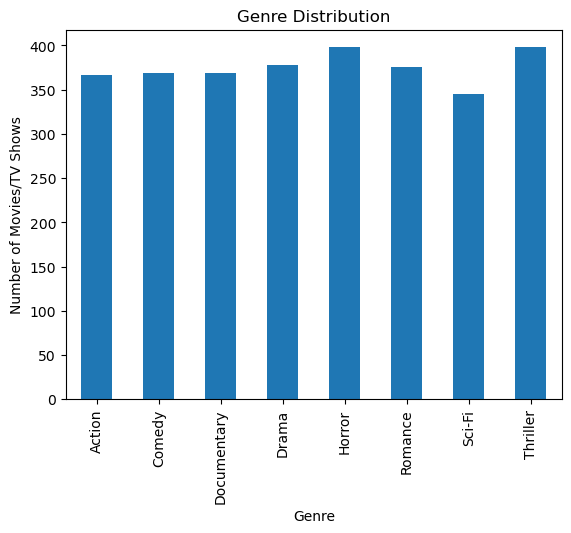

In [9]:
import matplotlib.pyplot as plt
genre_frequency = df['Genre'].value_counts().sort_index()

genre_relative_frequency = genre_frequency / genre_frequency.sum()

print("Frequency Table:")
print(genre_frequency)

print("\nRelative Frequency Table:")
print(genre_relative_frequency)

genre_frequency.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies/TV Shows')
plt.show()

# Based off of the genre counts and percentages for each genre in the above frequency table, it seems that each genre is pretty evenly distributed. The numbers in the table next to the genres represent the percentage of TV shows/movies in each genre, with Romance as 0.125333 (or 12.5333%).

In [18]:
import random
import numpy as np

genres = ["Action", "Comedy", "Documentary", "Drama", "Horror", "Romance", "Sci-Fi", "Thriller"]
weights = [12.2333, 12.3000, 12.3000, 12.6000, 13.2667, 12.5333, 11.5000, 13.2667]

num_trials = 10000

count = {genre: 0 for genre in genres}

# Simulate the trials
for _ in range(num_trials):
    chosen = random.choices(genres, weights)[0]
    count[chosen] += 1

percentages = [(count[genre] / num_trials) * 100 for genre in genres]

for genre, percentage in zip(genres, percentages):
    print(f"{genre} was picked {percentage:.2f}% of the time.")
    
std_dev = np.std(percentages)

print(f"\nStandard Deviation of the percentages: {std_dev:.4f}")

Action was picked 12.32% of the time.
Comedy was picked 12.25% of the time.
Documentary was picked 12.17% of the time.
Drama was picked 12.98% of the time.
Horror was picked 13.08% of the time.
Romance was picked 12.39% of the time.
Sci-Fi was picked 11.39% of the time.
Thriller was picked 13.42% of the time.

Standard Deviation of the percentages: 0.5980


# Using the frequency table's results for each genre's percentage, I found the empirical probability of each genre over 10,000 trials. All of the choices were picked pretty evenly, with romance being picked 12.39% of the time. Due to the Standard Deviation of the data being a low 0.5980%, the percentages of each genre do not vary much from the mean percentage. This means that if a genre were to be picked at random, the genres would have pretty even chances to get picked for the next TV show/movie on Netflix.

# My Answer

### Based on the genre distribution, the probability of the next Netflix TV show/movie being Romance is about 12.39%. With an empirical probability of 12.39% and a standard deviation of 0.5980, the chances for each genre to be the next TV show/movie are pretty evenly distributed. The empirical probability shows that after 10,000 trials being run to determine the next genre, Romance had 12.39% of the 10,000 trials, or 12.39% chance. The low standard deviation shows that all of the genres were pretty close to the mean percentage, meaning that they all had similar chances to be picked.